# Analysis of wind and solar energy data

## Reading the data

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import seaborn as sns

#import only second sheet
df = pd.read_excel('new_format-2020 (3).xlsx', sheet_name='SupIm')
df['date'] = pd.date_range(start='1/1/2020', periods=len(df), freq='H')
df = df.set_index('date')

#view DataFrame: all the data
#df

#view DataFrame head: some elements of the data
#print(df.head)
#print(list(df))

#view columns
#print(df.columns)

In [90]:
# plot constants
wind_color = 'green'
solar_color= 'red'
wind_solar_color= 'gold'
demand_color= 'blue'
solar_label = 'Solar irradiation ($kJ/m^2$'
solar_energy_label = 'Solar energy ($KWh$)'
wind_energy_label = 'Wind energy ($KWh$)'
demand_energy_label = 'Energy demand ($KWh$)'
wind_solar_energy_label = 'Wind + Solar ($KWh$)'

# column names
label = ['South West', 'South East', 'Greater London']
wind_column = ['SouthWest.Wind (m/s)','SouthEast.Wind (m/s)','GreaterLondon.Wind (m/s)']
solar_column = ['SouthWest.Solar (kJ/m2)','SouthEast.Solar (kJ/m2)','GreaterLondon.Solar (kJ/m2)']
wind_column_energy = ['SouthWest.Wind (MWh)','SouthEast.Wind (MWh)','GreaterLondon.Wind (MWh)']
solar_column_energy = ['SouthWest.Solar (MWh)','SouthEast.Solar (MWh)','GreaterLondon.Solar (MWh)']
demand_column_energy = ['SouthWest.Demand (MWh)','SouthEast.Demand (MWh)','GreaterLondon.Demand (MWh)']

<bound method NDFrame.head of                         t  SouthWest.Wind (m/s)  SouthWest.Solar (kJ/m2)  \
date                                                                       
2020-01-01 00:00:00     0              6.471513                      0.0   
2020-01-01 01:00:00     1              7.327003                      0.0   
2020-01-01 02:00:00     2              8.556605                      0.0   
2020-01-01 03:00:00     3              7.579646                      0.0   
2020-01-01 04:00:00     4              7.816800                      0.0   
...                   ...                   ...                      ...   
2020-12-30 19:00:00  8755             17.370674                      0.0   
2020-12-30 20:00:00  8756             17.697677                      0.0   
2020-12-30 21:00:00  8757             16.061313                      0.0   
2020-12-30 22:00:00  8758             15.209872                      0.0   
2020-12-30 23:00:00  8759             14.274141           

## Directly plot the wind data & solar data

Text(0.5, 0.98, 'Hourly wind speed and solar irradiation')

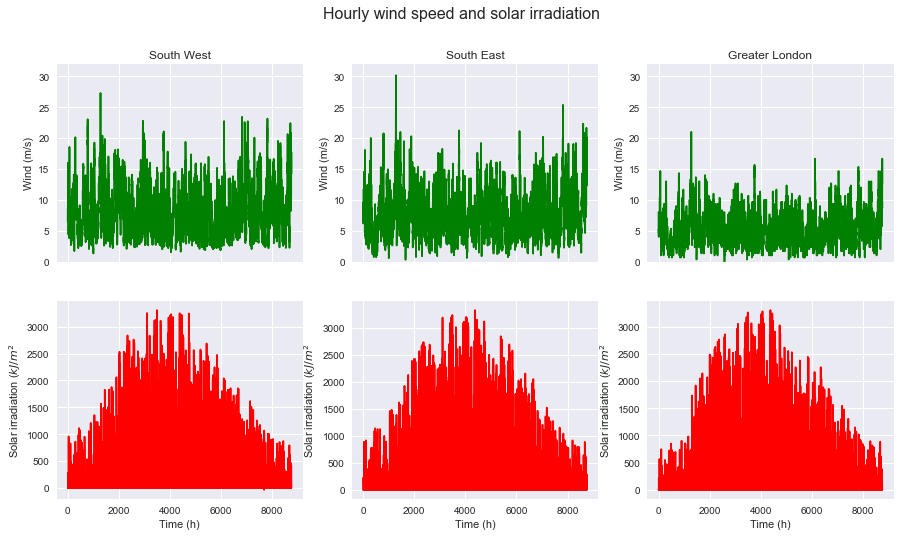

In [84]:
mpl.style.use('seaborn')
#Plot daily average
fig,ax =  plt.subplots(2,3,figsize=(15,8), sharex=True)
#x_ticks = pd.date_range(start='01/01/2020', end='12/31/2020', freq='3MS')
for i in [0,1,2]:
    axx = ax[0][i]
    x = df['t']
    y = df[wind_column[i]]
    axx.plot(x, y,label=label[i],color=wind_color)
    axx.set_ylabel(wind_label)
    axx.set_ylim(0,32)
    axx.title.set_text(label[i])
for i in [0,1,2]:
    axx = ax[1][i]
    x = df['t']
    y = df[solar_column[i]]
    axx.plot(x,y,label=label[i],color=solar_color)
    axx.set_ylabel(solar_label)
    axx.set_xlabel('Time (h)')
fig.suptitle('Hourly wind speed and solar irradiation', fontsize=16) 

## Resample and plot daily average

Text(0.5, 0.98, 'Daily average of wind speed and solar irradiation')

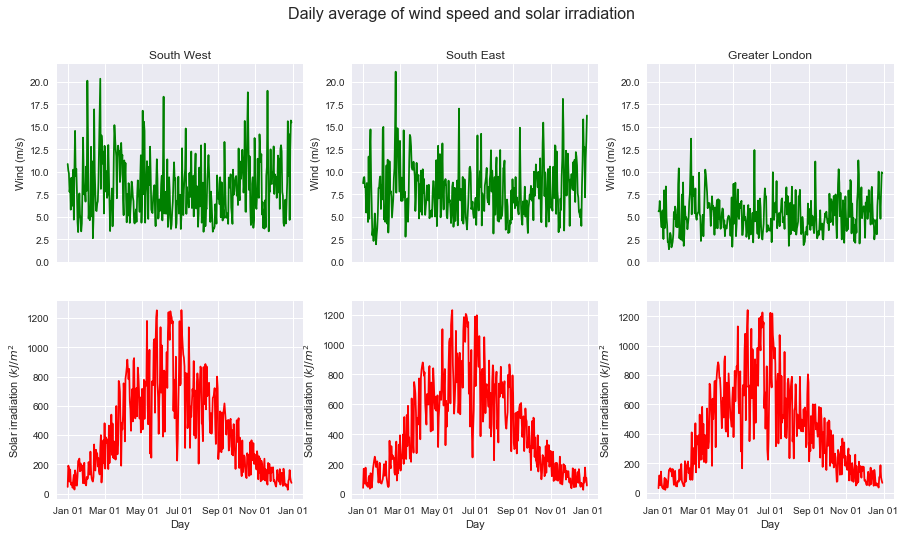

In [3]:
dfd = df.resample('D').mean()
fig,ax =  plt.subplots(2,3,figsize=(15,8), sharex=True)
#x_ticks = pd.date_range(start='01/01/2020', end='12/31/2020', freq='3MS')
for i in [0,1,2]:
    axx = ax[0][i]
    axx.plot(dfd[wind_column[i]],label=label[i],color=wind_color)
    axx.set_ylabel(wind_label)
    axx.set_ylim(0,22)
    axx.title.set_text(label[i])
    axx.xaxis.set_major_formatter(mdates.DateFormatter("%h %d"))
for i in [0,1,2]:
    axx = ax[1][i]
    axx.plot(dfd[solar_column[i]],label=label[i],color=solar_color)
    axx.set_ylabel(solar_label)
    axx.set_xlabel('Day')
    axx.xaxis.set_major_formatter(mdates.DateFormatter("%h %d"))
fig.suptitle('Daily average of wind speed and solar irradiation', fontsize=16)

## Hourly distribution

### Computing hourly distribution
_**Not needed as seaborn does the mean automatically**_

In [4]:
#dfh = df.groupby(df.index.hour).mean()
#dfh_std = df.groupby(df.index.hour).std()

### Plotting hourly distributions

Text(0.5, 0.98, 'Hourly distributions of wind speed and solar irradiation')

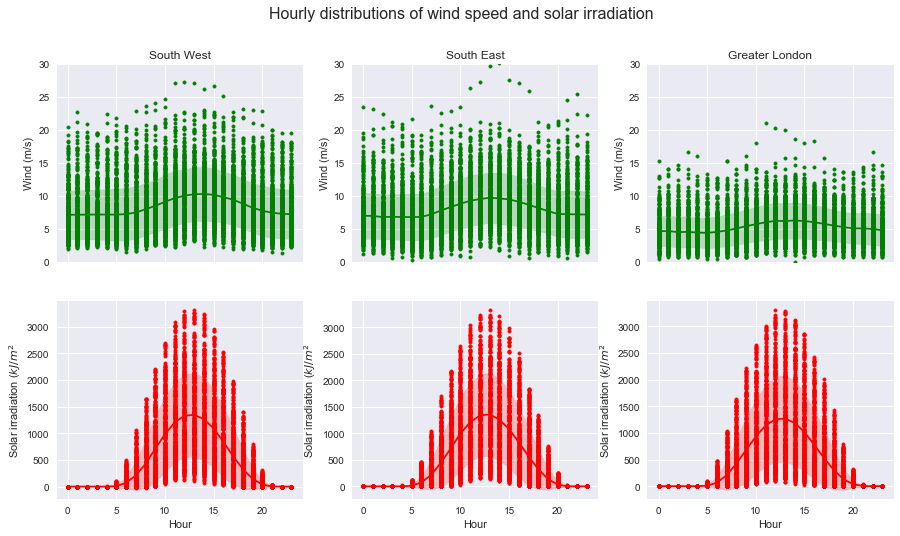

In [5]:
#create figure, and axes
mpl.style.use('seaborn')
fig,ax =  plt.subplots(2,3,figsize=(15,8), sharex=True)

for i in [0,1,2]:
    y=df[wind_column[i]]
    x=df.index.hour
    ax[0][i].set_ylabel(wind_label)
    ax[0][i].set_ylim(0,30)
    sns.lineplot(ax=ax[0][i], x=x, y=y,ci='sd',color=wind_color) #shade mean±std
    ax[0][i].scatter(x=x, y=y, marker='.',color=wind_color)
    ax[0][i].title.set_text(label[i])
for i in [0,1,2]:
    y=df[solar_column[i]]
    x=df.index.hour
    ax[1][i].set_ylabel(solar_label)
    ax[1][i].set_xlabel('Hour')
    sns.lineplot(ax=ax[1][i], x=x, y=y,ci='sd',color=solar_color)
    ax[1][i].scatter(x=x, y=y, marker='.',color=solar_color)
fig.suptitle('Hourly distributions of wind speed and solar irradiation', fontsize=16) 

# Analysis of wind and solar energy processed data

In [58]:
df_proc = pd.DataFrame({'date':pd.date_range(start='1/1/2020', periods=8760, freq='H')})
# put wind & solar data from each sheet into the dataframe df_proc
for i in [0,1,2]:
    df_proc_sheet = pd.read_excel('3 regions-post processing.xlsx', sheet_name=label[i])
    df_proc[wind_column_energy[i]] = df_proc_sheet['Wind MWh']
    df_proc[solar_column_energy[i]] = df_proc_sheet['Solar MWh']
    df_proc[demand_column_energy[i]] = df_proc_sheet['Demand MWh']
df_proc = df_proc.set_index('date')

In [66]:
df_proc_h = df_proc.groupby(df.index.hour).mean()
df_proc_h_std = df.groupby(df.index.hour).std()
df_proc_h

,SouthWest.Wind (MWh),SouthWest.Solar (MWh),SouthWest.Demand (MWh),SouthEast.Wind (MWh),SouthEast.Solar (MWh),SouthEast.Demand (MWh),GreaterLondon.Wind (MWh),GreaterLondon.Solar (MWh),GreaterLondon.Demand (MWh)
date,,,,,,,,,
0,1191.483851,0.000000,2267.061459,1489.008492,0.000000,3623.763031,657.516826,0.000000,1652.354539
1,1198.836931,0.000000,2212.498741,1460.937900,0.000000,3536.547769,674.496851,0.000000,1612.586338
2,1201.069574,0.000000,2205.229590,1398.278879,0.000000,3524.928463,635.003338,0.000000,1607.288195
3,1218.507099,0.000000,2153.726605,1409.440023,0.000000,3442.604001,644.728462,0.000000,1569.750090
4,1218.878368,21.719284,2128.649159,1405.727223,43.095147,3402.519193,587.321072,9.886941,1551.472318
5,1229.343442,180.773466,2126.162065,1418.830463,232.198828,3398.543722,597.569896,189.845734,1549.659593
6,1270.557488,368.191131,2248.197784,1449.635969,432.410059,3593.610568,645.360442,374.774795,1638.605692
7,1345.087540,648.664630,2525.639847,1618.307067,747.723126,4037.085220,730.614475,668.086245,1840.820172
8,1510.068331,1026.642872,2789.850697,1892.995889,1215.271090,4459.410563,835.938664,1068.504191,2033.391041


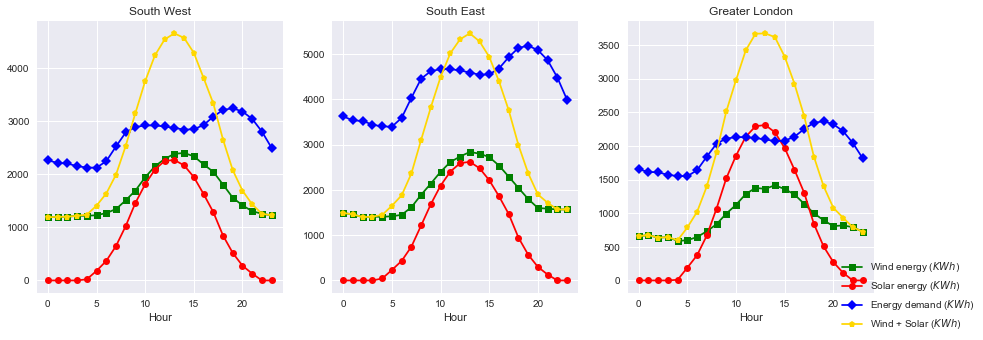

In [110]:
#create figure, and axes
mpl.style.use('seaborn')
fig,ax =  plt.subplots(1,3,figsize=(15,5), sharex=True)

for i in [0,1,2]:
    y=df_proc_h[wind_column_energy[i]]
    x=df_proc_h.index
    ax[i].plot(x,y,'s-',label=wind_energy_label,color=wind_color)
for i in [0,1,2]:
    y=df_proc_h[solar_column_energy[i]]
    x=df_proc_h.index
    ax[i].plot(x,y,'o-',label=solar_energy_label,color=solar_color)
for i in [0,1,2]:
    y=df_proc_h[demand_column_energy[i]]
    x=df_proc_h.index
    ax[i].plot(x,y,'D-',label=demand_energy_label,color=demand_color)
for i in [0,1,2]:
    y=df_proc_h[wind_column_energy[i]]+df_proc_h[solar_column_energy[i]]
    x=df_proc_h.index
    ax[i].plot(x,y,'p-',label=wind_solar_energy_label,color=wind_solar_color)
    ax[i].title.set_text(label[i])
    ax[i].set_xlabel('Hour')
handles, labels = ax[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right')